<a href="https://colab.research.google.com/github/alouwyck/vives-machine-learning/blob/main/05_perceptron/2_perceptron_theorie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

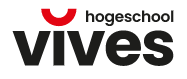<br>


**MACHINE LEARNING FUNDAMENTALS**<br>
Academiejaar 2023-2024<br>
Andy Louwyck

---



---



# PERCEPTRON: THEORIE

Deze notebook bevat de theorie over het perceptron algoritme. De eerste hardware implementatie van het algoritme gebeurde in 1957 door Rosenblatt die er in 1958 een publicatie over schreef. Rosenblatt liet zich inspireren door het model van McCulloch & Pitts van een neuron uit 1943. Wie geïnteresseerd is in de geschiedenis en meer achtergrondinformatie wenst, kan bijvoorbeeld de Engelstalige Wikipedia pagina raadplegen: https://en.wikipedia.org/wiki/Perceptron.

## INLEIDING

Het perceptron algoritme wordt toegepast bij **supervised learning**, en meer bepaald bij **classificatie**, omdat we met gelabelde data gaan werken, en de feature die we willen voorspellen is categorisch.

De perceptron is een **binaire classifier**, wat wil zeggen dat het twee klassen kan voorspellen: ja of nee, True of False, spam of ham, 1 of 0, ... Het is bovendien een **lineaire classifier** omdat het model lineair is. Eenvoudig uitgelegd betekent dit dat het een gewogen som neemt van de features die je gaat gebruiken om je voorspelling te maken, net zoals bij lineaire regressie. Het perceptron algoritme werkt trouwens op dezelfde manier als het regressie algoritme. Je begint met willekeurige parameters of gewichten, en past ze dan stap voor stap aan aan de hand van de voorbeelden in de trainingset.

De use case die we in deze les gaan behandelen is **sentimentanalyse** (Engels: sentiment analysis). Dit kent heel veel praktische toepassingen:
- analyseren van gesprekken tussen klanten en support om na te gaan of de service ok is;
- analyseren van online reviews om te zien of klanten tevreden zijn;
- tweets analyseren om na te gaan hoe de bevolking reageert op een bepaalde gebeurtenis;
- ...


## ALIEN PLANET ONE

Met onze spaceshuttle zijn we op een onbekende planeet met aliens geland. We ontmoeten 4 aliens en we zouden natuurlijk graag met hen praten, maar helaas verstaan we hun taal niet. Die taal lijkt ook slechts uit twee klanken te bestaan: "beep" en "aack". We kunnen wel zien of een alien blij is of niet zo blij wanneer die aan het spreken is. Dus houden we de klanken bij die ze produceren en hun gemoedstoestand. Op die manier kunnen we proberen te voorspellen of een vijfde alien al dan niet blij is om ons te zien als die een andere zin met de twee klanken uitspreekt.

Hieronder zie je de data: de zinnen en de stemming van de 4 aliens die we al hebben gezien. En dan de zin van de vijfde alien waarvan we willen weten of die blij is of niet.

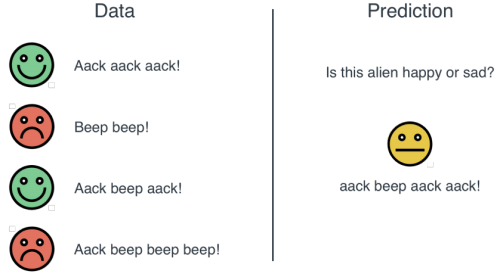

We zetten de data in een dataframe, samen met de labels:

In [ ]:
import pandas as pd
aliens = pd.DataFrame(dict(
    data=["Aack aack aack!", "Beep beep!", "Aack beep aack!", "Aack beep beep beep!"],
    happy=[True, False, True, False]
))

We kuisen de data op, d.w.z. we verwijderen extra spaties en uitroeptekens, en we vervangen hoofdletters door kleine letters:

In [ ]:
aliens["data"] = aliens["data"].str.lower().str.strip().str.replace("!", "")

Het ziet ernaar uit dat de aliens blij zijn als ze meer "aack" dan "beep" zeggen. We checken dit:

In [ ]:
aliens["data"].str.count("aack") >= aliens["data"].str.count("beep")

0     True
1    False
2     True
3    False
Name: data, dtype: bool

Onze observatie klopt, en we zouden een eenvoudige classifier kunnen implementeren die deze regel toepast. Bemerk ook dat we `>=` hebben gebruikt, wat wil zeggen dat we de zin ook als "happy" classificeren als het aantal keren "aack" in de zin gelijk is aan het aantal keren "beep". Wanneer we data met heel veel woorden zouden classificeren, dan zouden we ons daar geen zorgen over hoeven te maken, maar dit is nu eenmaal een eenvoudig voorbeeld...

#### *Wiskundige aanpak*

We gaan echter op een iets wiskundiger manier te werk gaan. Eerst voegen we twee kolommen toe die aangeven hoeveel keer "aack" in de zin voorkomt en hoeveel keer "beep". We noemen die kolommen daarom ook "aack" en "beep":

In [ ]:
for word in ["aack", "beep"]:
    aliens[word] = aliens["data"].str.count(word)
aliens

,data,happy,aack,beep
0,aack aack aack,True,3,0
1,beep beep,False,0,2
2,aack beep aack,True,2,1
3,aack beep beep beep,False,1,3


We zetten de kolom "aack" uit tegenover de kolom "beep" in een scatterplot. De "happy" punten kleuren we groen, de "unhappy" punten rood:

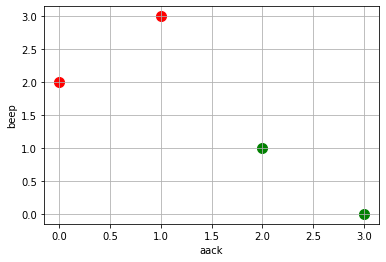

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)  # we willen de twee plots op hetzelfde assenstelsel 'ax'
aliens[aliens["happy"]].plot.scatter(x="aack", y="beep", color="green", s=100, ax=ax);  # s is de marker size
aliens[~aliens["happy"]].plot.scatter(x="aack", y="beep", color="red", s=100, ax=ax);
plt.grid()  # grid toevoegen

We zien dat de "happy" datapunten onderaan rechts op de figuur voorkomen en de "unhappy" bovenaan links. We voegen de rechte `y = x` toe aan de grafiek die de twee groepen opsplitst:

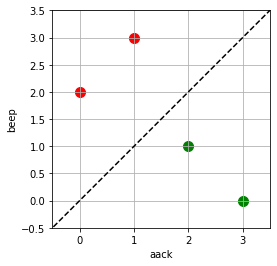

In [ ]:
import numpy as np
fig, ax = plt.subplots(1, 1)  # we willen de twee plots op hetzelfde assenstelsel 'ax'
aliens[aliens["happy"]].plot.scatter(x="aack", y="beep", color="green", s=100, ax=ax);  # s is de marker size
aliens[~aliens["happy"]].plot.scatter(x="aack", y="beep", color="red", s=100, ax=ax);
plt.plot(np.arange(-1, 5), np.arange(-1, 5), 'k--')  # rechte y = x plotten
plt.xlim((-0.5, 3.5))  # xlim
plt.ylim((-0.5, 3.5))  # ylim
ax.set_aspect("equal")  # x-as en y-as zelfde schaal geven
plt.grid()  # grid toevoegen

De rechte `y = x` bevat de datapunten waarbij het aantal keren "aack" (`x`) gelijk is aan het aantal keren "beep" (`y`). De "happy" datapunten liggen onder of op de rechte, of `x >= y`, de "unhappy" punten boven de rechte, of `x < y`. Dus net zoals in onze eenvoudige classifier! We kunnen die vergelijkingen gaan herschikken tot `x - y = 0`. De "happy" punten voldoen dan aan `x - y >= 0`, de "unhappy" punten aan `x - y < 0`.

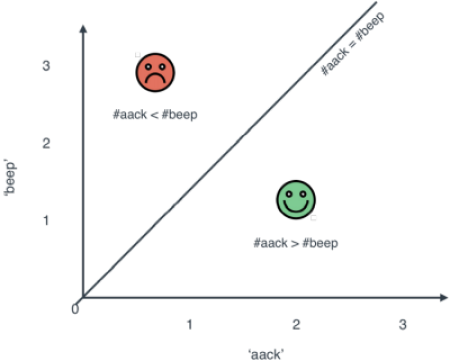

Herinner je dat we in de inleiding woorden een score hebben gegeven. Die scores noemen we de gewichten en het zijn de parameters van het model. Hier geven we de woorden "aack" en "beep" de volgende gewichten:
- "aack": 1 punt
- "beep": -1 punt

Kan je met deze wiskundige classifier voorspellen of de vijfde alien die de zin "Aack beep aack aack!" roept blij is of niet?

In [ ]:
zin = "Aack beep aack aack!"
zin = zin.strip().lower().replace("!", "").split(" ")
x = sum([word == "aack" for word in zin])
y = sum([word == "beep" for word in zin])
print("De alien is", "blij" if (x > y) else "niet blij")

De alien is blij


De eenvoudige classifier die gewoon het aantal "aacks" vergelijkt met het aantal "beeps", de geometrisch classifier die op de grafiek kijkt of punten boven of onder de diagonaal liggen, en de wiskundige classifier die gebruik maakt van de vergelijking van deze diagonaal, zijn drie manieren om het probleem op te lossen. Die manieren komen eigenlijk op hetzelfde neer, en ze illusteren mooi hoe een perceptron werkt.

> **PERCEPTRON:** *A perceptron is a classification model which consists of a set of weights, one for every feature, and a threshold. The perceptron multiplies each feature by its corresponding weights, and adds them, obtaining a score. If this score is greater than or equal to the threshold, then the perceptron returns a ‘yes’, or a ‘true’, or the value 1. If it is smaller, then it returns a ‘no’, or a ‘false’, or the value 0. In our case, the features are the words ‘aack’ and ‘beep’, the weights are +1 and -1, and the threshold is 0.*


## ALIEN PLANET TWO

De aliens op de vorige planeet waren al bij al toch niet zo blij om ons te zien, en dus vertrekken we met ons ruimteschip om een paar lichtjaren later op een nieuwe planeet te landen. Daar zijn ook buitenaardse wezens, maar die spreken een andere taal dan op de vorige planeet. Gelukkig bestaat deze taal ook uit slechts twee klanken: "crack" en "dunk". We observeren opnieuw de gemoedstoestand van de aliens wanneer ze een zin uitspreken, tellen het aantal keer dat de twee woorden voorkomen in de zin, en komen zo tot de tabel die in file "aliens2.csv" is opgeslagen.

We lezen de file in en we maken een scatter plot van de datapunten, waarbij we opnieuw de punten die met "happy" gelabeld zijn een groene kleur geven, en die met "sad" een rode kleur.

In [ ]:
import pandas as pd
aliens2 = pd.read_csv("aliens2.csv", sep=";")
aliens2

,Sentence,Crack,Dunk,Mood
0,Crack!,1,0,sad
1,Dunk dunk!,0,2,sad
2,Crack dunk!,1,1,sad
3,Crack crack dunk!,2,1,sad
4,Crack dunk dunk dunk!,1,3,happy
5,Crack dunk dunk crack!,2,2,happy
6,Crack dunk crack dunk crack!,3,2,happy
7,Crack dunk dunk crack dunk!,2,3,happy


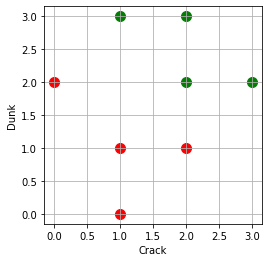

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)  # we willen de twee plots op hetzelfde assenstelsel 'ax'
aliens2[aliens2["Mood"]=="happy"].plot.scatter(x="Crack", y="Dunk", color="green", s=100, ax=ax);  # s is de marker size
aliens2[aliens2["Mood"]=="sad"].plot.scatter(x="Crack", y="Dunk", color="red", s=100, ax=ax);
ax.set_aspect("equal")  # x-as en y-as zelfde schaal geven
plt.grid()  # grid toevoegen

Een diagonaal trekken als bij de vorige alien dataset zal hier niet lukken, maar het valt in onze nieuwe dataset op dat de "happy" voorbeelden minimum 4 woorden hebben, terwijl de "sad" voorbeelden er maximaal 3 hebben. M.a.w. de "happy" datapunten hebben een hogere score dan de "sad" datapunten wanneer we de "Crack" en de "Dunk" kolom bij elkaar tellen:

In [ ]:
aliens2["score"] = aliens2["Crack"] + aliens2["Dunk"]
aliens2

,Sentence,Crack,Dunk,Mood,score
0,Crack!,1,0,sad,1
1,Dunk dunk!,0,2,sad,2
2,Crack dunk!,1,1,sad,2
3,Crack crack dunk!,2,1,sad,3
4,Crack dunk dunk dunk!,1,3,happy,4
5,Crack dunk dunk crack!,2,2,happy,4
6,Crack dunk crack dunk crack!,3,2,happy,5
7,Crack dunk dunk crack dunk!,2,3,happy,5


We kunnen nu een drempelwaarde of treshold definiëren, die bijvoorbeeld het gemiddelde is van de maximale score van de "sad" datapunten en de minimale score van de "happy" voorbeelden:

In [ ]:
treshold = (aliens2[aliens2["Mood"]=="sad"]["score"].max() +
            aliens2[aliens2["Mood"]=="happy"]["score"].min()) / 2
print(treshold)

3.5


A.d.h.v. deze drempelwaarde kunnen we nu een beslissingsregel formuleren om voorspellingen mee te doen:
- happy: #Crack + #Dunk >= 3.5
- sad: #Crack + #Dunk < 3.5

Als we nu #Crack gelijk stellen aan `x` en #Dunk aan `y`, dan hebben we de vergelijking van de rechte die geometrisch onze "sad" datapunten scheidt van onze "happy" punten: `x + y = 3.5`. Herschikken we dit, dan krijgen we `y = -x + 3.5`. Laten we die rechte en onze datapunten eens plotten om te zien of dit klopt:

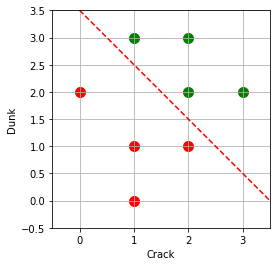

In [ ]:
import numpy as np

fig, ax = plt.subplots(1, 1)  # we willen de twee plots op hetzelfde assenstelsel 'ax'
aliens2[aliens2["Mood"]=="happy"].plot.scatter(x="Crack", y="Dunk", color="green", s=100, ax=ax);  # s is de marker size
aliens2[aliens2["Mood"]=="sad"].plot.scatter(x="Crack", y="Dunk", color="red", s=100, ax=ax);

x = np.arange(-1, 5)  # x-waarden
y = -x + 3.5  # y-waarden
plt.plot(x, y, 'k--')  # rechte y = -x + 3.5 plotten

plt.xlim((-0.5, 3.5))  # xlim
plt.ylim((-0.5, 3.5))  # ylim
ax.set_aspect("equal")  # x-as en y-as zelfde schaal geven
plt.grid()  # grid toevoegen

Dit lijkt inderdaad te kloppen. Uiteraard kunnen we nog andere drempelwaarden nemen, zoals 3.1 of 3.9, en die leiden telkens tot een andere rechte. Maar ook deze rechten zouden mooi tussen de groene en rode punten liggen.

Onze classifier kunnen we nu wiskundig als volgt formuleren:
- happy: `y + x - 3.5 >= 0`
- sad: `y + x - 3.5 < 0`

In Machine Learning noemen we de waarde -3.5 de **bias**. En dus moeten we de definitie van perceptron lichtjes wijzigen:

> **PERCEPTRON**: *A perceptron is a classification model which consists of a set of weights, and a bias. The perceptron calculates a score by adding the products of the features and their weights, plus the bias. If this score is greater than or equal to zero, the perceptron returns a ‘true’ or a value of 1. If the score is negative, the perceptron returns a ‘false’ or a value of 0. In our example, the features are the words ‘crack’ and ‘dunk’, the weights for each word  are both +1, and the bias is -3.5.*

#### *Bias*

Interessant om te zien is dat onze treshold eigenlijk de intercept is van onze scheidende rechte, en die is gelijk aan de negatieve bias. De intercept is het punt waar de rechte de y-as snijdt. De bias krijgen we trouwens als we `x` en `y` gelijk stellen aan 0, d.w.z. wanneer er nul keer "crack" en nul keer "dunk" wordt gezegd, wat dus neerkomt op een alien die niks zegt. Dit is het punt (0, 0), wat de oorsprong van ons assenstelsel is. In dat geval is de score gelijk aan de bias, nl. -3.5, en een negatieve score betekent dus dat we het datapunt als "sad" classificeren. Een stilzwijgende alien is dus niet blij!

Is de bias positief (en de intercept dus negatief), dan zou de stilzwijgende alien wel blij zijn. Dit wordt mooi op onderstaande grafiek geïllustreerd. De bias is als het ware de inherente gemoedstoestand van de aliens. De eigenlijke gemoedstoestand is die inherente gemoedstoestand plus de score van de woorden.

We spreken hier nu over aliens, maar ook bij mensen zijn er situaties waar niks zeggen gelijk is aan niet blij zijn. Denk maar aan twee personen die tegen elkaar botsen op straat, elkaar een kwade blik geven, en verder lopen. Omgekeerd kunnen we ook sentimentanalyses bedenken die modellen met een positieve bias als resultaat hebben. Reviews van restaurants bijvoorbeeld: tevreden klanten gaan niet snel iets schrijven, terwijl ontevreden klanten dat wel doen.

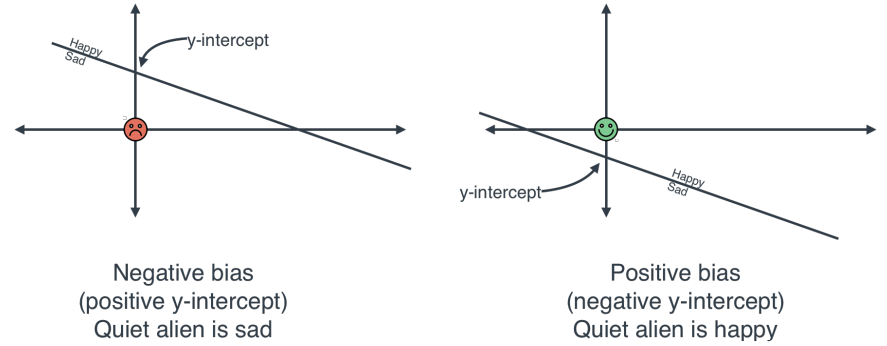

## ALGEMEEN

In de twee voorbeelden van de aliens hebben we gezien dat een **classifier** voor een taal met twee woorden of klanken als volgt kan gezien worden:
- **Wiskundig (algebraïsch)**: Een gewicht toegekend aan elk woord in een zin en dan de gewogen som genomen plus een bias om een score te krijgen. Zinnen met een positieve score, worden als 'happy' geclassificeerd, zinnen met een strikt negatieve score als 'sad'.
- **Geometrisch (meetkundig)**: Een lijn die de datapunten opsplitst wanneer die in een 2D vlak worden voorgesteld. Elke zin komt overeen met een punt. Ligt een punt boven (of op) de lijn, dan wordt die als 'happy' geclassificeerd, ligt een punt onder de lijn, dan is de overeenkomstige zin 'sad'.

Over het algemeen gaan we (veel) meer datapunten hebben en zullen sommige punten ook negatieve of reële getallen als coördinaten hebben. Vaak zal het ook zo zijn dat er geen rechte zal bestaan die de twee groepen datapunten mooi kan scheiden. In zo'n gevallen gaan we de lijn zoeken die de datapunten het best gaat opsplitsen, ook al worden enkele punten daardoor verkeerd geclassificeerd. Neem bijvoorbeeld de dataset in onderstaande figuur. Daar hebben we een rechte gevonden die slechts 3 fouten maakt, omdat 3 punten aan de verkeerde kant van de rechte liggen.

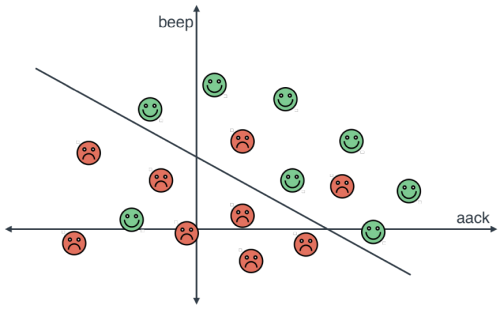

We kunnen onze classifier ook uitbreiden naar meer dan 2 woorden. Stel dat een alien taal uit 3 woorden bestaat: "aack", "crack" en "beep". In dat geval gaan de zinnen voorgesteld worden door 3 coördinaten: #aack, #crack en #beep. De datapunten kunnen we op die manier plotten in een 3D assenstelsel met #aack op de x-as, #crack op de y-as en #beep op de z-as.

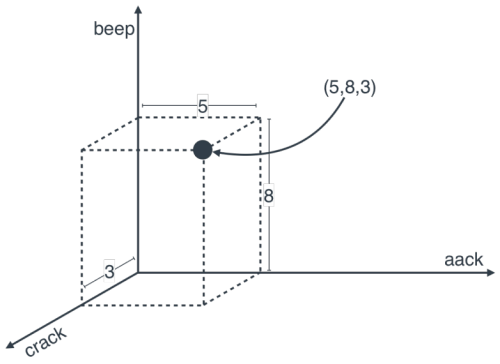

Op de figuur hierboven zien we het punt (5, 8, 3). Dit punt stelt een zin voor waarin 5 keer "aack" voorkomt, 8 keer "crack" en 3 keer "beep". Om de datapunten op te splitsen, gaan we nu niet op zoek naar een rechte, maar naar een vlak die de 'happy' punten van de 'sad' punten scheidt, zoals op onderstaande figuur is te zien.

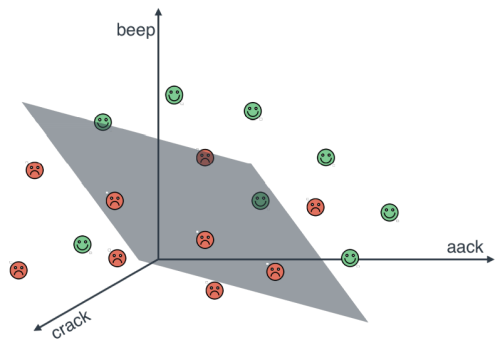

Dit is de geometrische interpretatie. Bekijken we dit 3D probleem algebraïsch, dan stellen we opnieuw een vergelijking op, maar nu met 3 variabelen `x`, `y` en `z`. Bijvoorbeeld: `2x + y -3z - 2.5 = 0`. In ons voorbeeld komt dat overeen met:

```
2 * aack + crack - 3 * beep - 2.5 = 0
```
Net als in het 2D geval betekent dit dat "aack" 2 punten krijgt, "crack" 1 punt en "beep" 3 punten. De treshold is 2.5 en dus is de bias -2.5.

En zo kunnen we dit veralgemenen naar **N dimensies**, wanneer de taal uit N woorden bestaat, wat dus neerkomt op een dataset met N features. In dit geval zoeken we een hypervlak van N-1 dimensies die de datapunten in de N-dimensionale ruimte gaat scheiden. De vergelijking van dit **hypervlak** bestaat dan uit N variabelen:

> $w_0 + w_1 x_1 + w_2 x_2 + ... + w_N x_N = \sum_{i=0}^{N} w_i x_i = 0$

Omdat deze variabelen $x_i$ niet met elkaar of met zichzelf worden vermenigvuldigd, of anders gezegd, omdat er geen machten in de vergelijking voorkomen, spreken we van een **lineaire classifier**. Merk op dat $w_0$ hier de bias term is.

Maar hoe vinden we de scores of gewichten en de bias? En hoe bepalen we de positie van de rechte of het (hyper)vlak die onze datapunten gaat scheiden? Het antwoord op deze vragen is het perceptron algoritme. Maar eerst moeten we een manier vinden om te oordelen hoe goed of hoe slecht onze classifier is.






## ERROR FUNCTIE

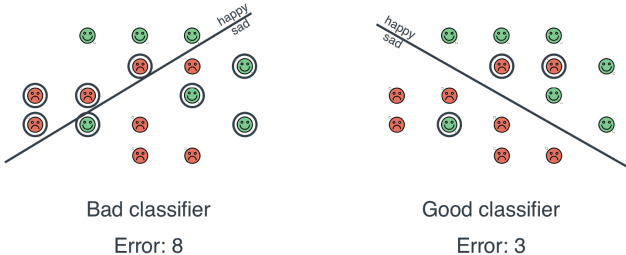

Op de figuur zie je een dataset en twee classifiers voorgesteld door een rechte die de datapunten opsplitst. De linker classifier heeft 8 van de 15 datapunten verkeerd geclassificeerd, de rechter slechts 3 van de 15. De linker heeft dus 8 fouten gemaakt, de rechter 3. De nauwkeurigheid (Engels: **accuracy**) van de linker is 7/15 of ongeveer 47%, die van de rechter is 12/15 of 80%. De nauwkeurigheid wordt heel vaak toegepast om een model te evalueren, maar hier is het niet zo'n goeie manier om als error of loss functie te gebruiken. Dat wordt in onderstaande figuur duidelijk gemaakt.

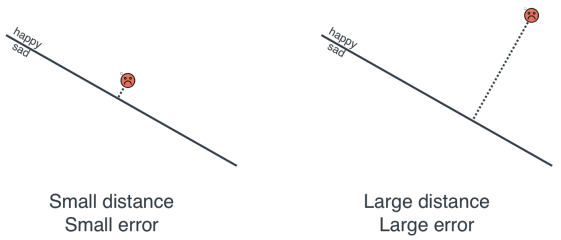

Beide punten zijn verkeer geclassificeerd, maar het punt in de linker figuur ligt veel dichter bij de scheidende rechte, en dus is dat punt minder fout geclassificeerd dan het punt in de rechter figuur, dat veel verder ligt van de rechte. Anders geformuleerd is de fout in de linker figuur kleiner dan die in de rechter figuur. We zouden dus als error functie de som van de loodrechte afstanden van de fout geclassificeerde datapunten tot de rechte kunnen nemen. Maar dat is wiskundig gezien iets te complex, omdat we dan gebruik moeten maken van de regel van Pythagoras die een hoop vierkantswortels en kwadraten zal opleveren.

Er is een eenvoudiger manier, namelijk de score van de datapunten als fout nemen. We herinneren ons dat datapunten op de scheidende rechte een score van nul hebben, datapunten dicht bij de rechte hebben een score dicht bij nul, en datapunten verder weg van de rechte hebben een grotere score. Dat geldt zowel voor correct als fout geclassificeerde punten, tenminste als we de absolute waarde van de score nemen, omdat scores ook negatief kunnen zijn. Dus komen we tot de volgende error functie:

- punt is correct geclassificeerd: fout = 0
- punt is fout geclassificeerd: fout = absolute waarde van de score

Het principe wordt geïllustreerd op de figuren. In de bovenste figuur gaat het om 'sad' datapunten die in de 'happy' zone boven de scheidende rechte liggen. In de bovenste figuur zijn het 'happy' punten die in de 'sad' zone onder de rechte liggen. In beide gevallen is de absolute waarde van de score groter naarmate het verkeerde geclassificeerde punt verder van de rechte ligt.

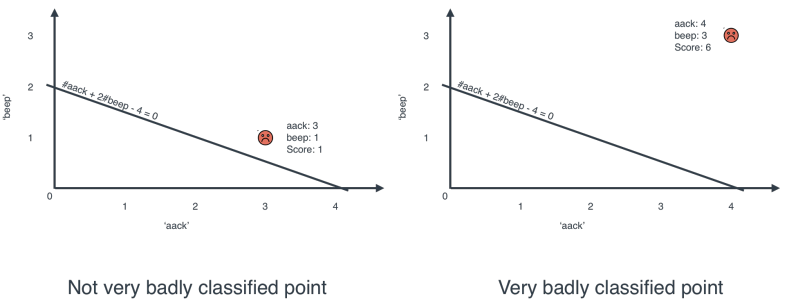

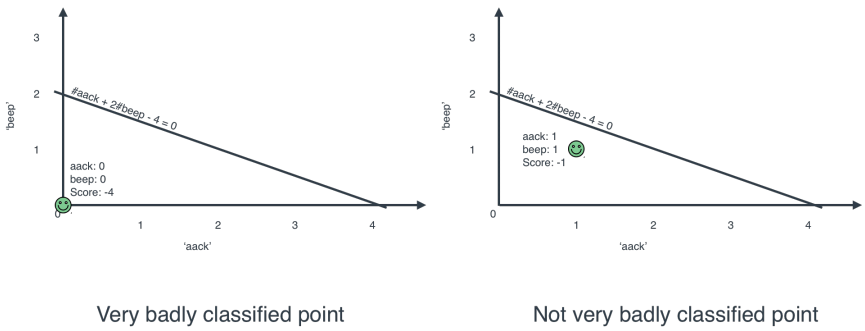

#### *Voorbeeld*

Als voorbeeld nemen we de volgende dataset:
- zin 1 (sad): "aack"
- zin 2 (happy): "beep"
- zin 3 (happy): "aack beep beep beep"
- zin 4 (sad): "aack beep beep aack aack"

En we passen er de volgende twee classifiers op toe:
- classifier 1: `x + 2 * y - 4 = 0`
- classifier 2: `-x + y = 0`

met `x` = #aack en `y` = #beep.

We stoppen de dataset in een dataframe, bepalen het aantal aacks en beeps, en berekenen de scores volgens de twee classifiers. O.b.v. deze scores kunnen we dan de voorspellingen bepalen en de totale error:

In [ ]:
import pandas as pd

# dataframe aanmaken
vb = pd.DataFrame(dict(
    zin=["aack", "beep", "aack beep beep beep", "aack beep beep aack aack"],
    happy=[False, True, True, False]
))

# woorden tellen
for word in ["aack", "beep"]:
    vb[word] = vb["zin"].str.count(word)

# classifiers
classifiers = dict(
    score1=lambda x, y: x + 2 * y - 4,
    score2=lambda x, y: -x + y
)

# scores
for name, score in classifiers.items():
    vb[name] = score(vb["aack"], vb["beep"])

# predicties en errors
for i in ["1", "2"]:
    # kolomnamen
    pred, score, error = tuple(map(lambda s: s + i, ["pred", "score", "error"]))
    # predicties
    vb[pred] = vb[score] >= 0  # happy als score >= 0
    # errors
    vb[error] = 0  # errors als 0 initialiseren
    vb.loc[vb["happy"] != vb[pred], error] = abs(vb[score])  # foute classificatie: error = abs(score)
    # print
    print(f"Total error classifier {i}: {vb[error].sum()}")

# toon dataframe
vb

Total error classifier 1: 5
Total error classifier 2: 0


,zin,happy,aack,beep,score1,score2,pred1,error1,pred2,error2
0,aack,False,1,0,-3,-1,False,0,False,0
1,beep,True,0,1,-2,1,False,2,True,0
2,aack beep beep beep,True,1,3,3,2,True,0,True,0
3,aack beep beep aack aack,False,3,2,3,-1,True,3,False,0


Het bekomen resultaat gaan we ook uitplotten. Let op dat we de vergelijking van de classifiers moeten herschikken als we de scheidende rechten willen plotten. Concreet moeten we `y` naar het linkerlid brengen, en de rest naar het rechterlid:
- classifier 1: $x + 2y - 4 = 0 <=> y = (-x + 4) / 2$
- classifier 2: $-x + y = 0 <=> y = x$

We maken gebruik van de functie `subplots()` om de scatterplots van de 2 classifiers naast elkaar te plaatsen. Voor de rest is de code gelijkaardig aan de scatterplots die we eerder hebben gemaakt, alleen moeten we de functies van het juiste `axes` object aanroepen om limieten e.d. aan te passen. Tenslotte voegen we ook score en error toe aan de datapunten m.b.v. de methode `text()`.

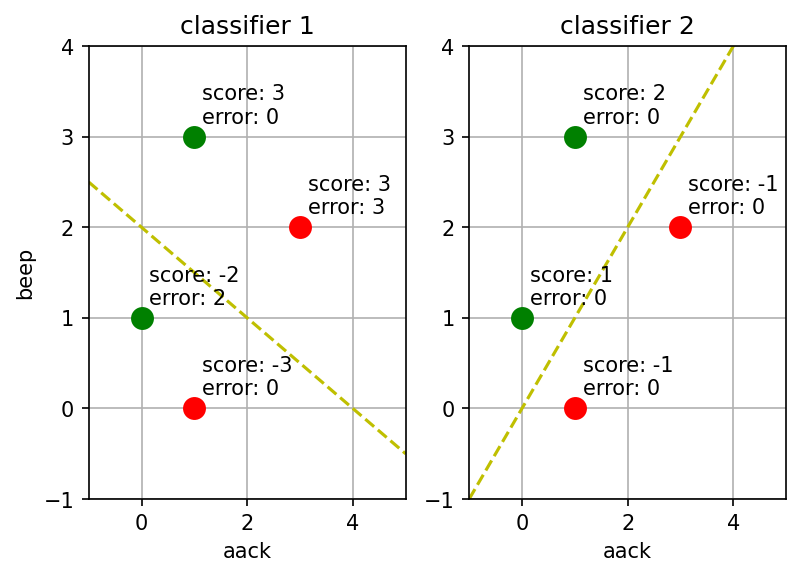

In [ ]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150  # hiermee maken we de figuren in de notebook groter
import matplotlib.pyplot as plt
import numpy as np

# scheidende rechten van de 2 classifiers
rechten = dict(
    score1=lambda x: (-x + 4) / 2,
    score2=lambda x: x
)

# figure en axes initialiseren
fig, ax = plt.subplots(1, 2)  # 2 plots naast elkaar: (1, 2) = (1 rij, 2 kolommen) -> 2 objecten: ax[0] en ax[1]

# overloop de 2 classifiers
for i in range(2):

    # kolomnamen
    j = str(i + 1)
    pred, score, error = tuple(map(lambda s: s + j, ["pred", "score", "error"]))

    # scatter plot
    vb[vb["happy"]].plot.scatter(x="aack", y="beep", s=100, color="g", ax=ax[i])
    vb[~vb["happy"]].plot.scatter(x="aack", y="beep", s=100, color="r", ax=ax[i])

    # scheidende rechte
    xline = np.arange(-1, 6)
    yline = rechten[score](xline)
    ax[i].plot(xline, yline, "y--")

    # limieten aanpassen
    ax[i].set_xlim((-1, 5))
    ax[i].set_ylim((-1, 4))

    # titel toevoegen
    ax[i].set_title("classifier " + j)

    # grid toevoegen
    ax[i].grid()
    ax[i].set_axisbelow(True)  # grid lijnen naar achtergrond brengen

    # ylabel verwijderen bij 2de plot
    if i == 1:
        ax[i].set_ylabel("")

    # error en score als text toevoegen bij elk datapunt
    for _, row in vb.iterrows():
        delta = 0.15  # coördinaat wat verschuiven zodat de tekst niet op de marker begint
        ax[i].text(row["aack"] + delta, row["beep"] + delta, f"score: {row[score]}\nerror: {row[error]}")

Yes! Nu we een goeie én eenvoudige error functie hebben gevonden, zijn we klaar om het perceptron algoritme te implementeren!

## PERCEPTRON ALGORITME

### **De classifier aanpassen o.b.v. één punt**

#### *Perceptron trick*

Het perceptron algoritme werkt op een gelijkaardige manier als het algoritme dat we bij lineaire regressie hebben toegepast. In pseudocode:
- begin with a random classifier;
- loop many times and improve the algorithm a small amount;
- output a good classifier.

Maar hoe maken we de classifier een beetje beter? En hoe weten we wanneer we een goede classifier hebben? En hoeveel iteraties zijn hiervoor nodig?

Net als bij lineaire regressie gaan we focussen op één datapunt met een keer, en we gaan ons daarbij telkens afvragen hoe we de classifier een beetje beter kunnen maken voor dat ene punt:
- Case 1: Als het punt correct is geclassificeerd, dan laten we de classifier met rust.
- Case 2: Als het punt fout is geclassificeerd, dan bewegen we de classifier een kleine beetje in de richting van het punt.

Dat noemen we de **"perceptron trick"**. Bemerk dat we de rechte niet direct voorbij het punt laten gaan zodat het aan de juiste kant van de rechte ligt. In plaats daarvan gaan we de rechte slechts een klein beetje in de goeie richting bewegen, omdat we maar naar 1 punt kijken en we de classificatie niet al te veel willen gaan verstoren. Als we die truc echter vele keren gaan herhalen voor alle punten, dan gaan we uiteindelijk tot een goeie classifier komen.


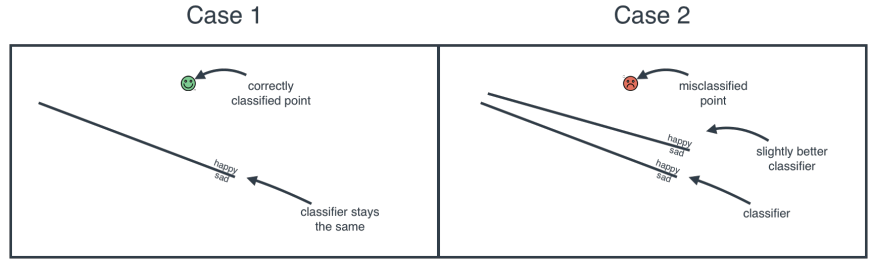

#### *Learning rate*

Maar hoeveel gaan we de rechte bewegen? Een heel klein beetje, en dat klein beetje wordt door de **learning rate** bepaald, net zoals bij lineaire regressie en bij vele andere Machine Learning algoritmes. Hier gaan we deze learning rate, die vaak wordt voorgesteld met een Griekse letter $\alpha$ (alfa) of $\eta$ (èta), gelijkstellen aan 0.01. Laten we dat eens in pseudocode weergeven:

INPUT:
- a classifier `ax + by + c = 0` with:
 - weight of `x`: `a`
 - weight of `y`: `b`
 - bias: `c`
- a datapoint `(x, y)` with label `True` or `False`
- a learning rate `eta` (default is 0.01)

PROCEDURE:
- if the point is classified correctly, then output the same classifier
- if the point with label `True` is misclassified as `False`, then output classifier with:
 - weight of `x`: `a + eta * x`
 - weight of `y`: `b + eta * y`
 - bias: `c + eta`
- if the point with label `False` is misclassified as `True`, then output classifier with:
 - weight of `x`: `a - eta * x`
 - weight of `y`: `b - eta * y`
 - bias: `c - eta`


De if statements kunnen we vermijden door label en predictie om te zetten naar integers 1 of 0 i.p.v. `True` of `False`. De drie gevallen zijn dan:
- het punt is correct geclassificeerd, label is dus gelijk aan predictie, waardoor `label - predictie = 0`
- het punt is verkeerd geclassificeerd, label is 1 en predictie is 0, waardoor: `label - predictie = 1`
- het punt is verkeerd geclassificeerd, label is 0 en predictie is 1, waardoor: `label - predictie = -1`

We kunnen dus `eta` vermenigvuldigen met het verschil tussen label en predictie, en dan kunnen we de scores en bias met één formule aanpassen:

- weight `a` van `x`: `a + (label - predictie) * eta * x`
- weight `b` van `y`: `b + (label - predictie) * eta * y`
- bias `c`: `c + (label - predictie) * eta`

Wanneer we nu gebruik maken van NumPy arrays, dan kunnen we zelfs de eerste 2 vergelijkingen samenvoegen:

> weights `[a, b]` van `[x, y]`: `[a, b] + (label - predictie) * eta * [x, y]`


Laten we als voorbeeld de classifier `x + 2 * y - 4 = 0` nemen. Het punt `[1, 1]` heeft als label `1`, maar de `predictie` is `0`. We passen de classifier aan met een learning rate `eta` van `0.01`:

In [ ]:
import numpy as np

# gegeven
ab = np.array([1, 2])  # [a, b]
c = -4                 # bias c
xy = np.array([1, 1])  # [x, y]
label = 1              # label
predictie = 0          # predictie
eta = 0.01             # learning rate

print(ab + (label - predictie) * eta * xy)  # aangepaste [a, b]
print(c + (label - predictie) * eta)        # aangepaste bias c

[1.01 2.01]
-3.99


#### *Van 2 naar n dimensies*

En zo kunnen we het probleem veralgemenen van 2 naar $n$ dimensies. Dat betekent dat ons datapunt $n$ features $x_1, x_2, ..., x_n$ heeft, en een label $y$. Dat is een beetje verwarrend omdat we daarnet onze tweede feature door `y` hebben voorgesteld omdat we het probleem in een (x,y) assenstelsel hebben voorgesteld. Maar vanaf nu gaan we onze features met $x_i$ aanduiden en het label met $y$, zoals dat gebruikelijk is in Machine Learning. Dus $x_1$ is dan onze `x` van daarnet, en $x_2$ onze `y`, en $y$ onze `label`. De `predictie` krijgt vaak $\hat{y}$ als symbool, maar hier gaan we $y_p$ gebruiken, omdat we dat gemakkelijker kunnen vertalen naar een variabele `yp` in onze Python code. De scores en de bias krijgen ook andere symbolen. Scores zijn eigenlijk gewichten die met $w_1, w_2, ..., w_n$ worden aangeduid, en de bias is $b$. Dus $w_1$ is onze `a`, $w_2$ onze `b`, en $b$ onze `c` van daarnet.

Het probleem dat we hier willen oplossen is dus algemeen geformuleerd:
- Gegeven:
 - een datapunt met `n` features $x_1, x_2, ..., x_n$
 - en label $y$
- Gevraagd:
 - gewichten $w_1, w_2, ..., w_n$
 - en bias $b$

De features stoppen we in vector **x** $= (x_1, x_2, ..., x_n)$, die we dus als NumPy array kunnen implementeren, net als de gewichten die we in vector **w** $= (w_1, w_2, ..., w_n)$ stoppen. Op die manier kunnen we onze berekeningen vectoriseren. De code die de vector **w** en de bias $b$ aanpast is dan eenvoudigweg:

- `w + (y - yp) * eta * x`
- `b + (y - yp) * eta`

Laten we als voorbeeld opnieuw de classifier `x + 2 * y - 4 = 0` nemen. Volgens de algemene notatie wordt dit `x1 + 2 * x2 - 4 = 0`. Het punt `[1, 1]` heeft als label `y = 1`, maar de predictie is `yp = 0`. We passen opnieuw de classifier aan met learning rate `eta = 0.01`, maar gebruiken nu de variabelen uit de algemene notatie:

In [ ]:
import numpy as np

# gegeven
w = np.array([1, 2])   # gewichten
b = -4                 # bias
x = np.array([1, 1])   # datapunt
y = 1                  # label
yp = 0                 # predictie
eta = 0.01             # learning rate

eta2 = (y - yp) * eta
print(w + eta2 * x)  # aangepaste gewichten
print(b + eta2)      # aangepaste bias

[1.01 2.01]
-3.99


#### *De stapfunctie*

We moeten nog één iets zelf gaan berekenen, nl. de predictie $y_p$. In twee dimensies moeten we eerst de totale score berekenen als `a*x + b*y + c`. Is die score groter of gelijk aan nul, dan is de predictie `True` of 1, anders `False` of 0. In het algemene geval van $n$ features doen we net hetzelfde:

- $y_p = 1$  als  $w_1x_1 + w_2x_2 + ... + w_nx_n + b \geq 0$
- $y_p = 0$  als  $w_1x_1 + w_2x_2 + ... + w_nx_n + b < 0$

Zoals we in de eerste les hebben gezien kunnen we de som verkort schrijven als $b + \sum_{j=1}^{n}w_jx_j$. En we kunnen ook gebruik maken van de zogenaamde Heaviside stapfunctie $H$ die waarden groter of gelijk aan nul afbeeldt op 1 en negatieve waarden op 0 (zie https://nl.wikipedia.org/wiki/Heaviside-functie). Zo kunnen we de twee bovenstaande beslissingsregels in één uitdrukking samenvatten:

> $y_p = H(b + \sum_{j=1}^{n}w_jx_j)$

Deze formule ziet er redelijk heftig uit, maar als we dat gaan coderen, dan kunnen we dat ook met één expressie doen die er gelijkaardig uitziet. Inderdaad, omdat **w** en **x** NumPy arrays zijn, kunnen we `yp` ook met één lijntje code berekenen:
> `yp = int(b + sum(w * x) >= 0)`

De expressie `sum(w * x)` kan eigenlijk nog efficiënter geschreven worden door gebruik te maken van de NumPy functie `dot()`:
> `yp = int(b + dot(x, w) >= 0)`

Met de `dot()` functie kunnen we matrixvermenigvuldigingen uitvoeren. In het geval van twee vectoren **x** en **w** gaat deze functie de som van het product van de overeenkomstige elementen van de vectoren berekenen, dus $\sum_{j=1}^{n}w_jx_j$. Dit noemt men het **inwendig of scalair product** (Engels: dot or scalar product).

Probeer het zelf eens uit met de volgende vectoren:
```
w = [1, 2, 3, 4]
x = [10, 20, 30, 40]
```
Implementeer het eerst met een lus of list comprehension. Daarna zet je de lists om naar een NumPy array en je past NumPy's `dot()` functie toe. Krijg je hetzelfde resultaat?

In [ ]:
w = [1, 2, 3, 4]
x = [10, 20, 30, 40]
# b = 0

# met lus
score = 0
for i in range(len(w)):
    score += w[i] * x[i]
print(score)

# met list comprehension en zip()
print(sum([wi * xi for wi, xi in zip(w, x)]))

# met sum
import numpy as np
print(np.sum(np.array(w) * np.array(x)))

# met np.dot()
print(np.dot(np.array(w), np.array(x)))

300
300
300
300


#### *Implementatie*

Laten we de procedure om een gegeven classifier met gewichten **w** en bias $b$ aan te passen obv een gegeven punt **x** met label $y$ nu implementeren als Python functie `perceptron_trick()`:

In [ ]:
import numpy as np

def perceptron_trick(w, b, x, y, eta=0.01):
    # w is een vector met gewichten (numpy array)
    # b is de bias (float)
    # x is een vector met coördinaten (numpy array)
    # y is een label (float)
    # eta is de learning rate (default is 0.01)
    # retourneert nieuwe w en b als tuple (w, b)
    yp = int(b + np.dot(x, w) >= 0)
    eta2 = (y - yp) * eta
    return  w + eta2 * x, b + eta2

Slechts 3 lijntjes code om al die berekeningen uit te voeren! Bovendien zijn deze gevectoriseerde expressies veel efficiënter dan wanneer we met lussen zouden werken. Snap je nu waarom NumPy zo belangrijk is voor Machine Learning?

Om onze functie te testen nemen we als voorbeeld de classifier #aack + #beep - 4 = 0, en de zin "aack" die een "happy" zin is, en dus `True` of 1 als label $y$ krijgt. $x_1$ is hier dus #aack en $w_1$ is 1, $x_2$ is #beep en $w_2$ is eveneens 1, en de bias $b$ is -4. De zin heeft als coördinaat (1, 0), omdat $x_1$ = #aack = 1 en $x_2$ = #beep = 0. Laten we nu de classifier verbeteren a.d.h.v. dit datapunt en m.b.v. onze functie:

In [ ]:
w = np.array([1, 1])
b = -4
x = np.array((1, 0))
w_new, b_new = perceptron_trick(w, b, x, y=1)
w_new, b_new

(array([1.01, 1.  ]), -3.99)

De score is -3, en dus is de voorspelling `False` ("sad"). Daarom is de classifier een klein beetje aangepast. Wanneer we dat punt en de twee classifiers plotten, dan zien we dat de aangepaste lijn inderdaad een heel klein beetje is opgeschoven in de richting van het punt.

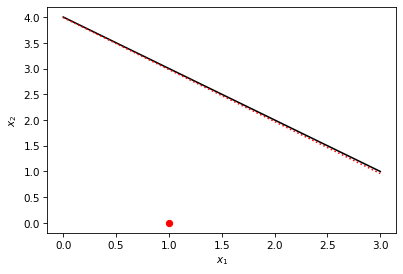

In [ ]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 75
import matplotlib.pyplot as plt

# w1*x1 + w2*x2 + b = 0 <=> x2 = (-w1*x1 - b) / w2
rechte = lambda w, b, xline: (-w[0] * xline - b) / w[1]

plt.plot(x[0], x[1], "ro")
xline = np.arange(0, 4)
plt.plot(xline, rechte(w, b, xline), 'k-');
plt.plot(xline, rechte(w_new, b_new, xline), 'r:');
plt.xlabel("$x_1$");  # $...$ om LaTeX te gebruiken zodat we subscripts kunnen weergeven
plt.ylabel("$x_2$");

Nemen we een andere zin "aack beep beep beep aack beep beep", die `False` ("sad") als label krijgt. De zin bevat 2 keer "aack" en 5 keer "beep", dus is de coördinaat van dat punt (2, 5). Laten we dat punt doorgeven aan onze functie samen met de originele classifier:

In [ ]:
x2 = np.array((2, 5))
w_new2, b_new2 = perceptron_trick(w, b, x2, y=False)
w_new2, b_new2

(array([0.98, 0.95]), -4.01)

De score is 3, wat betekent dat de voorspelling `True` ("happy") is. Dit is fout, en dus wordt de classifier aangepast. De plot laat zien dat de rechte inderdaad in de goeie richting is opgeschoven:

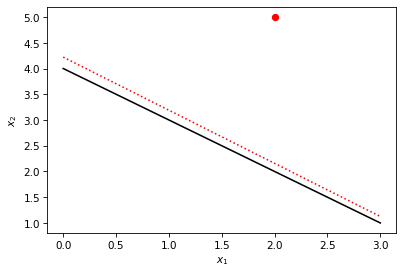

In [ ]:
plt.plot(x2[0], x2[1], "ro")
xline = np.arange(0, 4)
plt.plot(xline, rechte(w, b, xline), 'k-');
plt.plot(xline, rechte(w_new2, b_new2, xline), 'r:');
plt.xlabel("$x_1$");  # $...$ om LaTeX te gebruiken
plt.ylabel("$x_2$");

### **De classifier aanpassen o.b.v. de volledige trainingset**

In de vorige paragraaf hebben we de classifier aangepast o.b.v. één punt, maar natuurlijk moeten we rekening houden met alle punten in de trainingset. Dus moeten we onze perceptron truc toepassen voor alle punten. Wanneer we alle punten in de dataset hebben doorlopen, dan spreken we van een **epoch**. Eén keer de volledige dataset doorlopen zal natuurlijk niet voldoende zijn, omdat sommige punten willen dat de rechte niet beweegt, terwijl andere punten willen dat de rechte naar boven beweegt, en nog anderen dat ze naar beneden beweegt. Daarom bewegen we de rechte altijd maar een heel klein beetje bij een verkeerd geclassificeerd punt. Als we echter de dataset vele malen volledig doorlopen, dus veel epochs nemen, dan zal in de meeste gevallen het perceptron algoritme uiteindelijk convergeren naar een optimale classifier.

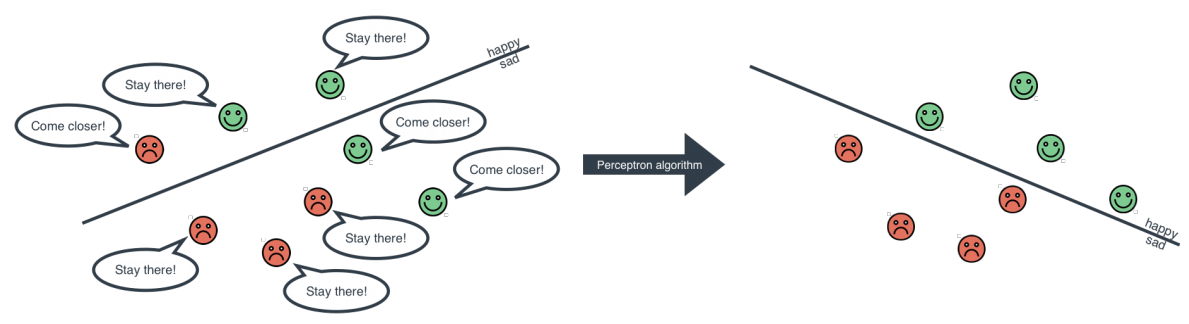

#### *Werken met matrices*

We gaan het perceptron algoritme nu in Python implementeren, maar we gaan generiek te werk gaan. Dat wil zeggen dat we het gaan coderen voor om het even welke dataset. In de vorige paragraaf hebben we al met $n$ features gewerkt. Het aantal examples in onze dataset gaan we ook variabel maken en aanduiden met $m$.

De $m$ examples kunnen we nu in een 2D matrix **X** stoppen: de rijen komen dan overeen met de $m$ examples, de kolommen met de $n$ features. Net als in een tabel of dataframe dus. Maar hier gaan we een NumPy array gebruiken en de shape van deze array is dus `(m, n)`. Element $x_{ij}$ van matrix **X** is dan de $j$-de feature van het $i$-de voorbeeld. In NumPy is dat `X[i, j]`.

De labels van de $m$ examples stoppen we dan ook in een vector **y**, en ook hier is element $y_j$ van deze vector het label van example $j$. In NumPy is dat `y[j]`. Deze vector bestaat dus uit nullen en enen. Het is gebruikelijk om `X` met een hoofdletter aan te duiden, omdat het een matrix is, en `y` met een kleine letter, omdat het een vector is.

Zoals we in de vorige paragraaf hebben gezien is de algemene vergelijking van onze lineaire classifier $w_1x_1 + w_2x_2 + ... + w_nx_n + b = 0$. Geometrisch gezien is dat een hypervlak. Het perceptron algoritme zoekt de optimale gewichten $w_1, w_2, ..., w_n$ en $b$ zodat dat hypervlak de `m` datapunten zo goed als mogelijk opsplitst volgens de gegeven labels. Deze vergelijking kunnen we dan toepassen op nieuwe data: geeft deze vergelijking een positieve uitkomst, dan is het voorspelde label $y_p$ gelijk aan 1, en anders 0.

Als voorbeeld lezen we opnieuw de "aliens2.csv" dataset in als dataframe en construeren matrix `X` met de datapunten en vector `y` met de labels. Hier zijn er 8 examples, dus $m$ = 8. En we hebben 2 features, "Crack" en "Dunk", dus $n$ = 2.

In [ ]:
import pandas as pd

aliens2 = pd.read_csv("aliens2.csv", sep=";")
X = aliens2[['Crack', "Dunk"]].values
print(X)
y = (aliens2.Mood == 'happy').to_numpy().astype(int)
print(y)

[[1 0]
 [0 2]
 [1 1]
 [2 1]
 [1 3]
 [2 2]
 [3 2]
 [2 3]]
[0 0 0 0 1 1 1 1]


#### *Totale fout*

Om de totale fout te berekenen die de classifier maakt bij het opsplitsen van de trainingsset, moeten we ook de vergelijking van de classifier gaan toepassen. We herinneren dat de fout gelijk is aan nul wanneer een punt correct werd geclassificieerd, en gelijk is aan de absolute waarde van de uitkomst van deze vergelijking is wanneer een punt foutief werd geclassificeerd. We hebben in de vorige paragraaf de `dot()` functie geïntroduceerd om de som van de overeenkomstige elementen van twee vectoren te berekenen. Deze functie kunnen we ook gaan toepassen op een matrix en een vector. In dit geval zal de functie het inwendig product berekenen van alle rijen van de matrix met de vector. Het resultaat is dus een nieuwe vector waarvan het aantal elementen gelijk is aan het aantal rijen in de matrix.

Dus als we de scores van onze voorbeelden in de trainingsset willen berekenen zonder gebruik te maken van lussen, dan doen we dat als volgt:

> `scores = b + np.dot(X, w)`

Het resultaat is dus een vector `scores` met $m$ elementen. Let op! Hier is de volgorde van de argumenten belangrijk! Dus eerst `X` en dan `w`!

Laten we dat eens uittesten met een eenvoudig voorbeeldje. We berekenen de scores voor elk voorbeeld (= elke rij)
 in een gegeven matrix met data `X` voor een gegeven vector van gewichten `w`.
```
X = [[1, 2],
     [3, 4],
     [5, 6]]
w = [2, 3]
```
We doen dit op 4 verschillende manieren: m.b.v. twee lussen, een list comprehension, de `sum` functie, en de `dot` functie:

In [ ]:
# gegeven
X = [[1, 2],
     [3, 4],
     [5, 6]]
w = [2, 3]
# b = 0

# met twee for-lussen
scores = []
for row in X:
    score = 0
    for xi, wi in zip(row, w):
        score += xi * wi
    scores.append(score)
print(scores)

# met een list comprehension
print([sum([xi * wi for xi, wi in zip(row, w)]) for row in X])

# met numpy arrays en sum()
import numpy as np
X = np.array(X)
w = np.array(w)
print(np.sum(X * w, axis=1))

# met numpy arrays en dot()
print(np.dot(X, w))

[8, 18, 28]
[8, 18, 28]
[ 8 18 28]
[ 8 18 28]


De predicties $y_p$ stoppen we ook in een vector `yp`:

> `yp = (scores >= 0).astype(int)`

Nu zijn er drie gevallen:

- de voorspelling is correct: $y_p - y = 0$
- de voorspelling is fout, en $y_p = 1$ en $y = 0$: $y_p - y = 1$
- de voorspelling is fout, en $y_p = 0$ en $y = 1$: $y_p - y = -1$

In geval 1 moet de fout nul zijn, in geval 2 is de score positief en moet de fout gelijk zijn aan de score, in geval 3 is de score negatief en moet de fout gelijk zijn aan de score maal -1. Dit kunnen we in 1 lijn schrijven:

> `errors = (yp - y) * scores`

We krijgen dus een vector `errors` met de fouten van de $m$ datapunten. De totale fout die het perceptron algoritme maakt is dan de som van al deze fouten: `sum(errors)`.

Laten we dat in een aparte functie `perceptron_error()` implementeren:

In [ ]:
import numpy as np

def perceptron_error(w, b, X, y):
    # w is een vector met gewichten (numpy array met lengte n)
    # b is de bias (float)
    # X is een matrix met de datapunten (numpy array met shape (m, n))
    # y is een vector met de labels (numpy array met lengte n)
    # retourneert de totale error (float)

    scores = b + np.dot(X, w)  # alle scores
    yp = (scores >= 0).astype(int)  # predicties
    errors = (yp - y) * scores  # errors
    return np.sum(errors)  # totale error

#### *Het perceptron algoritme*

We zijn klaar om het perceptron algoritme te implementeren. We definiëren daarvoor de functie `perceptron()`. De inputparameters zijn `X` en `y`, het aantal epochs `num_of_epochs`, en de learning rate `eta` die we standaard op 0.01 zetten. Het doorlopen van alle datapunten in één epoch doen we willekeurig en daarvoor gebruiken we de functie `shuffle()` uit de module `random`. We beginnen het algoritme met een random classifier. Dit doen we door aan de gewichten een willekeurige waarde tussen 0 en 1 toe te kennen. Daarvoor kunnen we de NumPy `random.random()` gebruiken. De bias wordt initieel op 0 gezet. De functie retourneert de gewichten `w` en de bias `b` van de optimale classifier, en een array `errors` met de waarden van de totale error die na elke epoch werd berekend en bijgehouden.

In [ ]:
from random import shuffle

def perceptron(X, y, num_of_epochs, eta=0.01):
    # X is een matrix met de datapunten (numpy array met shape (m, n))
    # y is een vector met de labels (numpy array met lengte m)
    # num_of_epochs is een integer > 0 die het aantal epochs aangeeft
    # eta is de learning rate (default is 0.01)
    # retourneert:
    # - de gewichten w (numpy array met lengte n)
    # - de bias b (float)
    # - de totale error na elke epoch (numpy array met lengte num_of_epochs)

    m, n = X.shape  # aantal examples en features
    ind = list(range(m))  # list met indices

    # initialisatie
    w = np.random.random(n)  # gewichten initialiseren met kleine random waarde
    b = 0  # bias initialiseren als 0
    errors = np.array([])  # array met totale fout

    # epochs doorlopen
    for _ in range(num_of_epochs):

        # dataset willekeurig doorlopen
        shuffle(ind)  # shuffle indices
        for i in ind:

            # classifier aanpassen volgens "perceptron trick"
            w, b = perceptron_trick(w, b, X[i, :], y[i], eta)

        # totale error berekenen na elke epoch
        error = perceptron_error(w, b, X, y)
        errors = np.append(errors, error)

    # ouput
    return w, b, errors

#### *Test case: Alien Planet Two*

Als testcase nemen we opnieuw de dataset "aliens2.csv" van onze tweede planeet met aliens:

In [ ]:
import pandas as pd

aliens2 = pd.read_csv("aliens2.csv", sep=";")
X = aliens2[["Crack", "Dunk"]].values  # 2 features "Crack" en "Dunk" als array opvragen
y = (aliens2["Mood"]=="happy").values.astype(int)  # labels omzetten naar array met 1 en 0
print("X:")
print(X)
print("shape:", X.shape)
print("\ny:")
print(y)
print("shape:", y.shape)

X:
[[1 0]
 [0 2]
 [1 1]
 [2 1]
 [1 3]
 [2 2]
 [3 2]
 [2 3]]
shape: (8, 2)

y:
[0 0 0 0 1 1 1 1]
shape: (8,)


En laten we nu eens proberen een goeie classifier te vinden door gebruik te maken van onze `perceptron()` functie:

In [ ]:
w, b, errors = perceptron(X, y, 200)
w, b

(array([0.01074974, 0.16831173]), -0.34000000000000014)

Een plot van de totale fout na elke epoch toont aan dat het algoritme effectief in staat is om de classifier steeds beter te maken, tot de totale fout minimaal is:

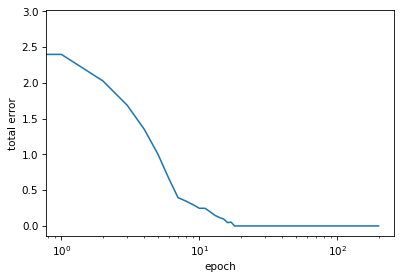

In [ ]:
import matplotlib.pyplot as plt

plt.semilogx(errors);
plt.xlabel("epoch");
plt.ylabel("total error");

Tenslotte schrijven we een generieke functie `plot_perceptron()` om een scatterplot van een dataset met 2 features te maken met daarop ook de rechte geplot die de classifier voorstelt:

In [ ]:
def plot_perceptron(X, y, w, b):
    plt.scatter(X[y==1, 0], X[y==1, 1], color="green")
    plt.scatter(X[y==0, 0], X[y==0, 1], color="red")
    xline = np.arange(0, 4)
    yline = -xline * w[0] / w[1] - b / w[1]
    plt.plot(xline, yline, 'k:');
    plt.grid()
    plt.xlabel("$x_1$");  # $...$ om LaTeX te gebruiken
    plt.ylabel("$x_2$");

Uiteraard passen we deze functie toe om de optimale classifier te visualiseren die we met ons algoritme hebben gevonden:

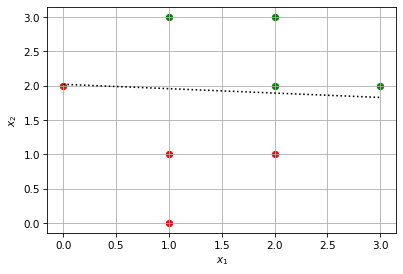

In [ ]:
plot_perceptron(X, y, w, b)

### **Gradient Descent**

Het perceptron algoritme is gelijkaardig aan dat van lineaire regressie. Zoals we weten zoekt het algoritme bij lineaire regressie de best passende rechte door met een willekeurige rechte te starten, om daarna stap voor stap dichter en dichter bij de datapunten te komen. We vergeleken dit proces met het afdalen van een berg. Elk punt op de berg komt overeen met een rechte en de hoogte van het punt is de totale fout die aangeeft hoe ver de rechte van de punten ligt, de RMSE. De bedoeling is om die fout te minimaliseren door de berg stap voor stap af te dalen, waarbij we kijken naar de helling, en de richting nemen waar de helling het grootst is, zodat we het snelst kunnen dalen.

Bij het perceptron is het probleem een beetje anders, omdat we nu een rechte zoeken die onze dataset het best opsplitst. We starten hierbij ook met een willekeurige rechte en gaan die stap voor stap aanpassen tot we een optimale scheidende lijn hebben gevonden. En dus gaat de analogie met het afdalen van de berg opnieuw op, alleen is de fout hier niet de RMSE, maar de perceptron error.

In de wiskunde wordt de helling van een oppervlak beschreven door de gradiënt. Daarom wordt deze methode "gradient descent" genoemd. Op basis van de gradiënt gaan we telkens de gewichten en de bias aanpassen. Wij hebben de wiskundige afleiding achterwege gelaten, maar het resultaat van die afleiding is onze "perceptron trick". En wat is de rol van de learning rate? Wel, die bepaalt welke fractie van de gradiënt we telkens gaan nemen zodat we geen te grote stappen nemen, waardoor we riskeren om over het minimum springen ("overshooting").

Als we de puntjes op de i willen zetten, dan maken we bij zowel lineaire regressie als de perceptron gebruik van een variant van gradient descent, namelijk **stochastic gradient descent** (SGD). Waarom stochastisch? Omdat we de datapunten willekeurig doorlopen en dus de gradiënt gaan benaderen door slechts naar één punt te kijken i.p.v. de echte gradiënt te berekenen a.d.h.v. alle punten. Een ander toevalselement in het algoritme is het willekeurig initialiseren van de gewichten. We starten dus op een willekeurige plaats op de berg vooraleer we die beginnen afdalen.

We zouden ook alle datapunten in rekening kunnen brengen om een stap naar beneden te berekenen. Dit noemt men **batch gradient descent**. Bij hele grote datasets is dat natuurlijk niet zo'n goed idee, en dus gaat men vaak een gulden middenweg kiezen door met zogenaamde mini-batches te werken. In dat geval neemt een klein aantal willekeurig geselecteerde datapunten uit de dataset om de volgende stap te berekenen. Deze variant noemt men daarom **mini-batch gradient descent**.

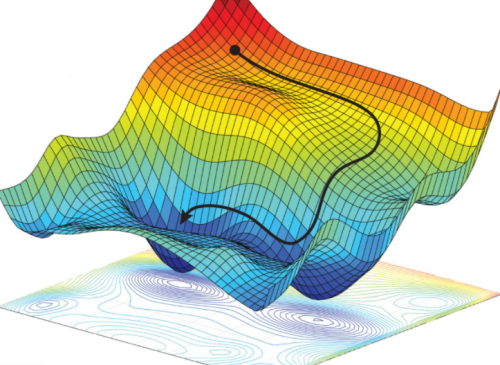

Net als op de figuur hierboven kunnen we ook zelf de error functie uitzetten op een contourplot. In ons voorbeeld van de aliens, hebben we 3 parameters: $w_1$, $w_2$ en $b$. De error functie is dus een vierdimensionaal oppervlak. Daarom nemen we de bias gelijk aan -3.5, zoals we dat intuïtief hadden afgeleid. We moeten dan enkel de gewichten $w_1$ en $w_2$ laten variëren en de error berekenen m.b.v. onze functie `perceptron_error()`. Op de figuur zien we dan een witte zone waar de error nul is. Er zijn dus meerdere oplossingen, zoals we dat ook hebben ondervonden, en dat komt omdat we een classificatieprobleem oplossen met een error functie die niet continu maar discreet is (de step functie).

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log10
  from ipykernel import kernelapp as app


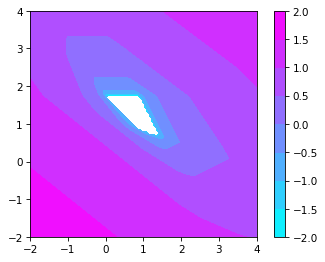

In [ ]:
nw = 100  # aantal intervallen voor w1 en w2
w1 = np.linspace(-2, 4, nw)  # w1 varieert van -2 tot 4
w2 = w1.copy()  # idem voor w2
b = -3.5  # bias laten we niet variëren
errors = np.zeros((nw, nw))  # error matrix initialiseren

# perceptron error berekenen voor elke combinatie van w1 en w2
for i in range(nw):
    for j in range(nw):
        errors[i, j] = perceptron_error(np.array([w1[i], w2[j]]), b, X, y)

# contour plot maken van onze error functie
fig, ax = plt.subplots()
w2, w1 = np.meshgrid(w2, w1)  # meshgrid matrices voor w1 en w2
cs = ax.contourf(w1, w2, np.log10(errors),
                 cmap=plt.cm.cool);  # filled contour
ax.set_aspect("equal")  # assen gelijke schaal geven
fig.colorbar(cs);  # colorbar toevoegen

Om de zone duidelijker te maken waar de fout 0 is, hebben we de error functie logaritmisch getransformeerd. De logaritme van 0 is namelijk min oneindig, en dat kan niet voorgesteld worden op de plot, waardoor we een wit "gat" krijgen. Zo zien we dat het punt (1, 1) in die zone ligt, en dat hadden we eerder al intuïtief afgeleid. Maar ook de punten (0.5, 1.5) en (1, 1.5) liggen in die zone, wat we eenvoudig kunnen checken:

In [ ]:
for point in [(1, 1), (0.5, 1.5), (1, 1.5)]:
    print(point, "heeft fout", perceptron_error(np.array(point), b, X, y))

(1, 1) heeft fout 0.0
(0.5, 1.5) heeft fout 0.0
(1, 1.5) heeft fout 0.0


### **Hyperparameters**

Een andere term die je vaak zal tegenkomen in Machine Learning is "hyperparameter". In het geval van ons perceptron algoritme hebben we twee hyperparameters: de **learning rate** en het **aantal epochs**. Maar waarom noemen we dat hyperparameters?

Laten we eens teruggaan naar les 1 waar we het over "remember - formulate - predict" hadden.
- In de "remember" stap creëren we onze dataset met features en labels.
- In de "formulate" stap gaan we een model opstellen. Hier is ons model de vergelijking van een hypervlak om onze datapunten te scheiden. Deze vergelijking bevat variabelen $x_1, x_2, ..., x_n$, gewichten $w_1, w_2, ..., w_n$ en een bias $b$. De gewichten en de bias zijn de parameters die we m.b.v. het perceptron algoritme gaan afleiden.
- In de "predict" stap gaan we het gevonden model toepassen op nieuwe data. Hier gaan we van die nieuwe data zeggen of ze aan de ene of de andere kant van het hypervlak liggen waarvan we in de vorige stap de gewichten en de bias hebben bepaald. Zo voorspellen we tot welke van de twee categorieën de datapunten behoren.

In de "formulate" stap zoeken we dus waarden voor de gewichten en de bias zodat we een classifier vinden die zo weinig mogelijk datapunten in de trainingsset verkeerd classificeert. Anders gezegd gaan we de optimale parameters van ons model zoeken. Dit doen we stapsgewijs en dat iteratieve proces noemen we ook het trainen van het model. Het model wordt na elke epoch ook beter en dus leert het algoritme uit de data door de parameters aan te passen aan de hand van de fouten die het heeft gemaakt. De fouten laten we echter niet volledig doorwegen, maar slechts een kleine fractie, en deze fractie noemen we de learning rate.

Het leerproces zelf hangt dus ook af van twee parameters die gaan bepalen of en hoe snel we een optimale oplossing gaan vinden: de learning rate en het aantal epochs. Maar omdat die parameters geen deel uitmaken van het model, noemt men ze hyperparameters. Ze sturen het leerproces van het algoritme en worden door de gebruiker opgegeven. Op die manier heeft de gebruiker enige controle over het leerproces. In dit voorbeeld zijn er slechts 2 hyperparameters, maar het kunnen er meer zijn. Dit hangt af van het leeralgoritme.  


Laten we eens zien wat de invloed van die twee hyperparameters is op het leerproces van het perceptron algoritme. Stel dat we slechts 5 epochs trainen:

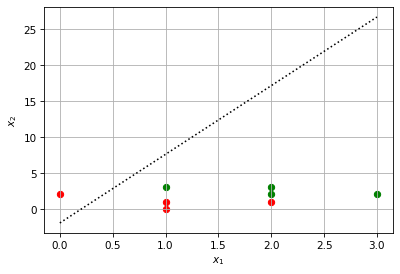

In [ ]:
w, b, errors = perceptron(X, y, num_of_epochs=5, eta=0.01)
plot_perceptron(X, y, w, b)

Dat ziet er niet goed uit. We kunnen dus best een voldoende groot aantal epochs nemen, beter te veel dan te weinig. Maar ook niet te veel, want bij zeer grote datasets en bij veel complexere algoritmes duurt het veel langer om één epoch te doorlopen.

Maar misschien kunnen we het leerproces versnellen door met de learning rate te spelen? Laten we 5 verschillende learning rates bekijken: 0.0001, 0.001, 0.01, 0.1 en 1:

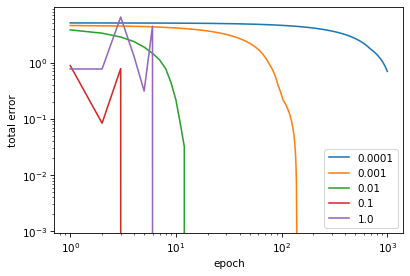

In [ ]:
np.random.seed(0)  # seed opgeven zodat we telkens hetzelfde resultaat uitkomen
k = 5  # aantal eta's
etas = np.logspace(-4, 0, k)  # de eta's
num_of_epochs = 1000  # aantal epochs
errors = np.zeros((num_of_epochs, k))  # initialiseren van de errors matrix

# trainen met de 5 verschillende eta's
for i, eta in enumerate(etas):
    _, _, errors[:, i] = perceptron(X, y, num_of_epochs, eta)

# fout vs epoch plotten voor de 5 eta's
plt.loglog(np.arange(1, num_of_epochs+1), errors);
plt.xlabel("epoch");
plt.ylabel("total error");
plt.legend(etas);

Het lijkt erop dat we sneller tot de optimale oplossing komen wanneer we de learning rate vergroten. Maar we moeten natuurlijk rekening houden met het feit dat we hier met een zeer klein en eenvoudig probleem te maken hebben. De foutcurves bij grotere learning rates vertonen echter bruuske schommelingen en dat is niet zo goed, omdat we op die manier de minimale fout kunnen missen. Bij grote en complexe datasets zal het daarom de kunst zijn om een learning rate te kiezen die niet te groot is, maar ook niet te klein, want zoals je kan zien duurt het trainen effectief langer bij kleinere learning rates. In het geval van 0.0001 hebben we na 1000 epochs zelfs nog geen oplossing gevonden.

## SCIKIT-LEARN

Het is een goeie en leerrijke oefening om het perceptron algoritme zelf te implementeren. Op die manier krijgen we meer inzicht in hoe dit en gelijkaardige machine learning algoritmes werken. Maar we moeten ook het wiel niet opnieuw gaan uitvinden. Python kent verschillende packages voor Machine Learning, zoals `scikit-learn`. Dit bevat een klasse `Perceptron` in de module `linear_model`. Daarmee kunnen we exact hetzelfde doen (en nog veel meer) als met onze `perceptron()` functie.

In [ ]:
import pandas as pd
from sklearn.linear_model import Perceptron

Laten we opnieuw onze "aliens2.csv" dataset nemen. Ook hier zetten we de dataset om naar een matrix `X` en een vector `y`.

In [ ]:
aliens2 = pd.read_csv("aliens2.csv", sep=";")
X = aliens2[["Crack", "Dunk"]].values
y = (aliens2["Mood"] == "happy").values.astype(int)

We creëren nu een `Perceptron` object, waarvan we de methode `fit()` toepassen op onze dataset. De learning rate is hier inputparameter `eta0`:

In [ ]:
p = Perceptron(eta0=0.01)
p.fit(X, y)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.01,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

Klasse `Perceptron` bevat nog heel veel andere attributen, die uitvoerig in de documentatie worden beschreven: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html. Maar wij zijn natuurlijk geïnteresseerd in de gewichten en de bias. Die vinden we in attributen `coef_` en `intercept_`, respectievelijk:

In [ ]:
print("gewichten:", p.coef_)
print("bias:", p.intercept_)

gewichten: [[0.02 0.02]]
bias: [-0.07]


Dit zijn ook NumPy arrays. Met onze functie `plot_perceptron()` kunnen we het resultaat plotten:

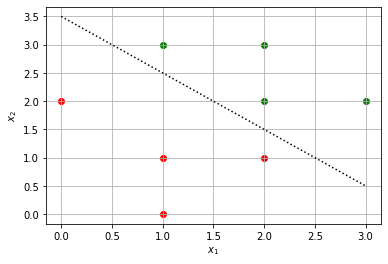

In [ ]:
plot_perceptron(X, y, p.coef_.flatten(), p.intercept_.item())

De klasse `Perceptron` bevat ook een methode `predict()` waarmee we voorspellingen kunnen doen:

In [ ]:
p.predict(X)

array([0, 0, 0, 0, 1, 1, 1, 1])

## TOEPASSINGEN

Net zoals regressie, heeft classificatie veel toepassingen in ons dagdagelijkse leven. In principe kunnen we het perceptron algoritme toepassen voor elk probleem waarin we een vraag met ja/nee willen beantwoorden en waarbij dat antwoord wordt voorspeld a.d.h.v. gelabelde data.

- sentimentanalyse
- spamfilters
- recommender systems
- medische classificatie algoritmen
- computer vision
- ...

De perceptron heeft echter ook enkele nadelen. Eerst en vooral kunnen slechts twee klassen worden voorspeld. Maar wat als we drie klassen hebben, bijv. kat, hond en vogel? Dan worden drie perceptrons gebruikt: de eerste classificeert de data volgens hond / geen hond, de tweede volgens kat / geen kat, en de derde volgens vogel / geen vogel. Als de eerste hond zegt, de twee geen kat, en de derde geen vogel, dan is het een hond. Maar wat als de derde vogel zegt?

Een ander probleem is dat de perceptron geen nuance kent. De zinnen "ik ben content" en "ik ben dolgelukkig" zouden beiden als "blij" worden geclassificeerd, terwijl de tweede zin duidelijk "blijer" is dan de eerste. In plaats van beide zinnen een score van 1 te geven, zouden we bijvoorbeeld liever de eerste zin een score van 0.6 geven, en de tweede 0.9.

Gelukkig bestaat er een oplossing voor deze problemen en die gaan we in de volgende les bespreken: de continue perceptron of **logistische regressie**.




---



---
## BRONNEN
*  Handboek: Grokking Machine Learning (version 12), Manning Early Access Program, by Luis G. Serrano, 2020.
*  Online Scikit-Learn documentation: https://scikit-learn.org/stable/
*  https://towardsdatascience.com/batch-mini-batch-stochastic-gradient-descent-7a62ecba642a

---